In [117]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [118]:
# Read the Excel file into a DataFrame
df1 = pd.read_csv('/content/drive/MyDrive/1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/5.csv')
df = pd.concat([df1, df2, df3, df4, df5], axis=0)
df = df.sample(frac=1).reset_index(drop=True)#shuffling
df.head()

,Time,Sensor 1,Sensor 2,Type,Concentration
0,624.0,0.413213,0.398739,4,0.5
1,1276.0,0.796269,0.470658,2,1.0
2,1858.0,1.388449,1.098473,4,1.2
3,1063.0,1.254443,0.633736,1,0.8
4,1697.0,0.774516,0.455550,5,4.5


In [119]:
df.describe()

,Time,Sensor 1,Sensor 2,Type,Concentration
count,11979.00000,11979.000000,11979.000000,11979.000000,11979.000000
mean,1006.82461,0.917626,0.605097,2.706236,1.299841
std,590.82572,0.394342,0.228555,1.505742,1.129704
min,0.00000,0.363435,0.301388,1.000000,0.200000
25%,499.00000,0.562837,0.406014,1.000000,0.600000
50%,998.00000,0.800677,0.607146,3.000000,1.000000
75%,1497.25000,1.258806,0.716103,4.000000,1.500000
max,2312.00000,1.933908,1.596574,5.000000,5.000000


In [120]:
corr_matrix = df.corr()
corr_matrix

,Time,Sensor 1,Sensor 2,Type,Concentration
Time,1.000000,0.428337,0.519710,0.052572,0.412523
Sensor 1,0.428337,1.000000,0.734291,-0.564237,-0.001855
Sensor 2,0.519710,0.734291,1.000000,-0.219912,-0.039916
Type,0.052572,-0.564237,-0.219912,1.000000,0.593761
Concentration,0.412523,-0.001855,-0.039916,0.593761,1.000000


In [121]:
y=df['Type']
X=df.drop('Type',axis=1)
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state = 1)

In [122]:
X

,Time,Sensor 1,Sensor 2,Concentration
0,624.0,0.413213,0.398739,0.5
1,1276.0,0.796269,0.470658,1.0
2,1858.0,1.388449,1.098473,1.2
3,1063.0,1.254443,0.633736,0.8
4,1697.0,0.774516,0.455550,4.5
...,...,...,...,...
11974,474.0,1.228151,0.638280,0.5
11975,1715.5,1.343491,0.869005,1.5
11976,999.0,0.688375,0.395826,0.8
11977,642.5,1.348871,0.717083,0.6


In [123]:
y

0        4
1        2
2        4
3        1
4        5
        ..
11974    1
11975    1
11976    2
11977    1
11978    2
Name: Type, Length: 11979, dtype: int64

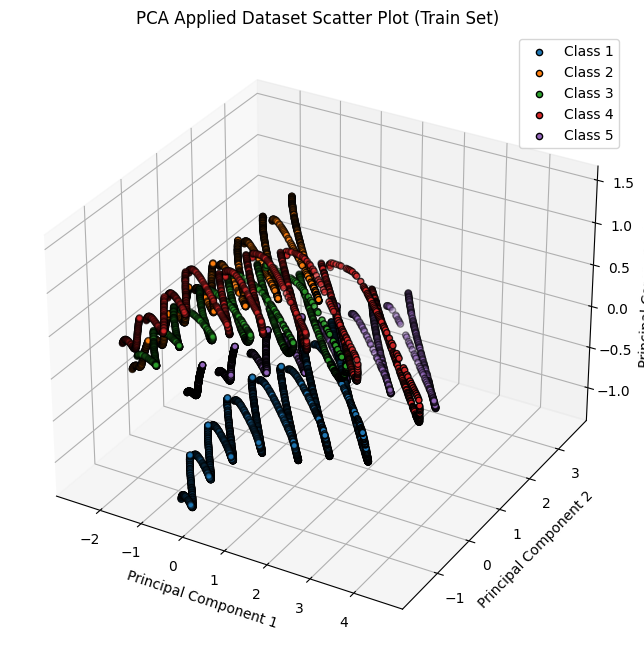

In [124]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying PCA to reduce dimensions to 3
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating a DataFrame from PCA components
pca_df_train = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df_train['label'] = y_train.values

# Plotting scatter plot of PCA applied dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in np.unique(pca_df_train['label']):
    ax.scatter(pca_df_train.loc[pca_df_train['label'] == label, 'PC1'],
               pca_df_train.loc[pca_df_train['label'] == label, 'PC2'],
               pca_df_train.loc[pca_df_train['label'] == label, 'PC3'],
               label=f'Class {label}', edgecolor='k')

ax.set_title('PCA Applied Dataset Scatter Plot (Train Set)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

Explained Variance Ratio: [0.53920718 0.29964225 0.10220843]


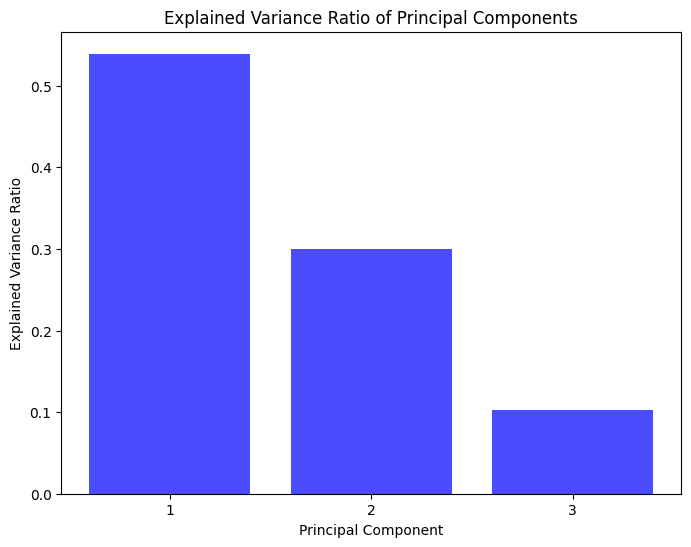

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='b', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.show()


In [126]:
import numpy as np

# Assuming X_train is your feature data

# Generate Gaussian noise with the same shape as X_train
mu, sigma = 0, 0.1  # Mean and standard deviation
noise = np.random.normal(mu, sigma, X_train_pca.shape)

# Add the noise to the feature data
X_train_pca = X_train_pca + noise

Logistic Regression

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import time

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter

# Measure training time
start_train = time.time()
log_reg.fit(X_train_scaled, y_train)
end_train = time.time()
train_time = end_train - start_train

# Perform K-fold cross-validation
start_cv = time.time()
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf)
end_cv = time.time()
cv_time = end_cv - start_cv

# Predict testing data and measure testing time
start_test = time.time()
predictions = log_reg.predict(X_test_scaled)
end_test = time.time()
test_time = end_test - start_test

# Print training, cross-validation, and testing time
print("Training Time:", train_time, "seconds")
print("Cross-validation Time:", cv_time, "seconds")
print("Testing Time:", test_time, "seconds")

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())


Training Time: 0.12901997566223145 seconds
Cross-validation Time: 0.5072321891784668 seconds
Testing Time: 0.0004889965057373047 seconds
Cross-validation scores: [0.85390578 0.84138342 0.86165772 0.83124627 0.84436494]
Average cross-validation score: 0.8465116279069769


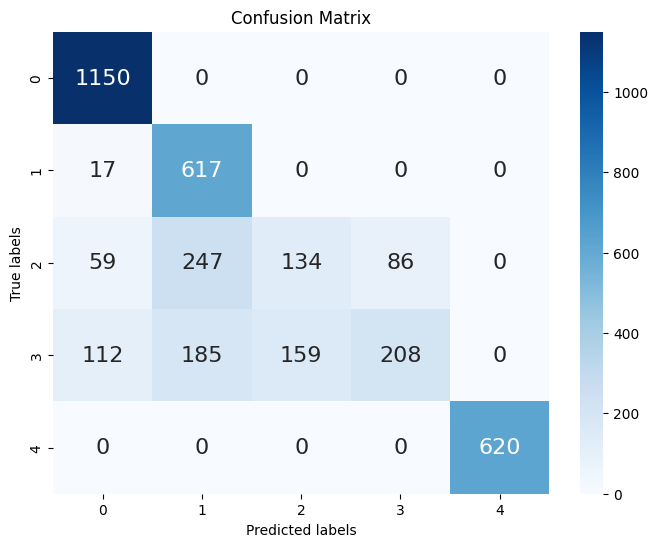

In [128]:
# Make predictions on the test set
log_reg.fit(X_train_scaled, y_train)
predictions = log_reg.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

KNN

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import time

# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Measure training time
start_train = time.time()
knn.fit(X_train_pca, y_train)
end_train = time.time()
train_time = end_train - start_train

# Perform K-fold cross-validation
start_cv = time.time()
cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=kf)
end_cv = time.time()
cv_time = end_cv - start_cv

# Print training and cross-validation time
print("Training Time:", train_time, "seconds")
print("Cross-validation Time:", cv_time, "seconds")

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())


Training Time: 0.009309768676757812 seconds
Cross-validation Time: 0.46686768531799316 seconds
Cross-validation scores: [0.89564699 0.89683959 0.89445438 0.88670244 0.88968396]
Average cross-validation score: 0.892665474060823


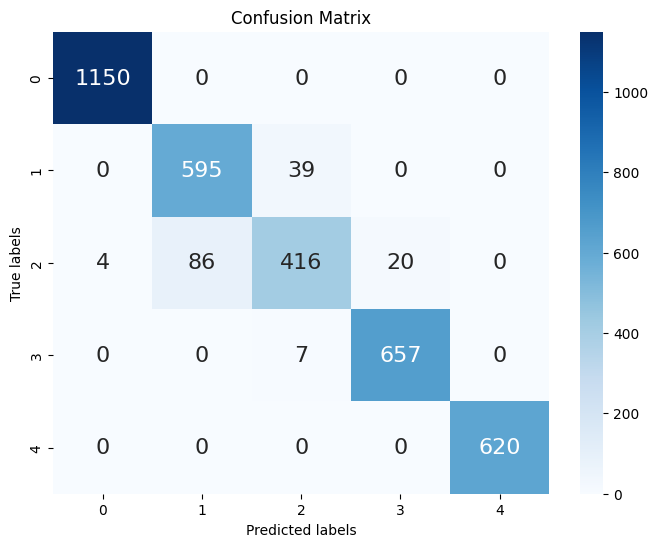

In [130]:
# Make predictions on the test set
knn.fit(X_train_pca, y_train)
predictions = knn.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import time

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Measure training time
start_train = time.time()
nb_classifier.fit(X_train_pca, y_train)
end_train = time.time()
train_time = end_train - start_train

# Perform K-fold cross-validation
start_cv = time.time()
cv_scores = cross_val_score(nb_classifier, X_train_pca, y_train, cv=kf)
end_cv = time.time()
cv_time = end_cv - start_cv

# Print training and cross-validation time
print("Training Time:", train_time, "seconds")
print("Cross-validation Time:", cv_time, "seconds")

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())


Training Time: 0.0064122676849365234 seconds
Cross-validation Time: 0.026299715042114258 seconds
Cross-validation scores: [0.74299344 0.75968992 0.76267144 0.74716756 0.75193798]
Average cross-validation score: 0.7528920691711389


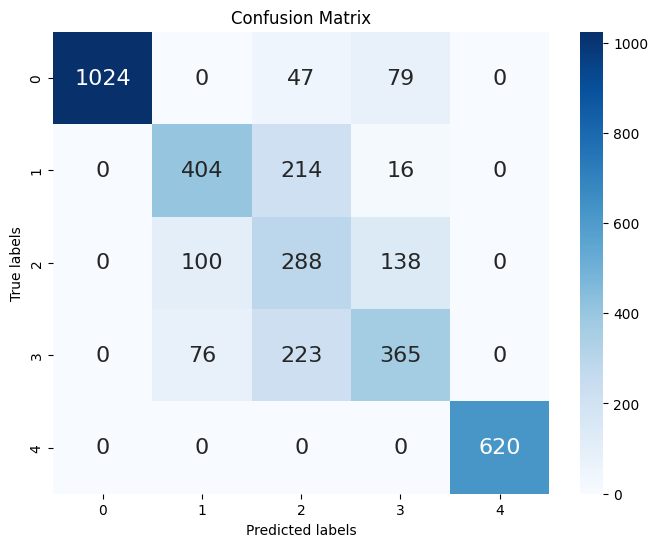

In [132]:
nb_classifier.fit(X_train_pca, y_train)
# Make predictions on the test set
predictions = nb_classifier.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Random forest

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
import time

# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100)

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Measure training time
start_train = time.time()
rf_classifier.fit(X_train_pca, y_train)
end_train = time.time()
train_time = end_train - start_train

# Perform K-fold cross-validation
start_cv = time.time()
cv_scores = cross_val_score(rf_classifier, X_train_pca, y_train, cv=kf)
end_cv = time.time()
cv_time = end_cv - start_cv

# Print training and cross-validation time
print("Training Time:", train_time, "seconds")
print("Cross-validation Time:", cv_time, "seconds")

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())


Training Time: 1.4457929134368896 seconds
Cross-validation Time: 6.740186929702759 seconds
Cross-validation scores: [0.89326178 0.89564699 0.90220632 0.89385808 0.89445438]
Average cross-validation score: 0.8958855098389982


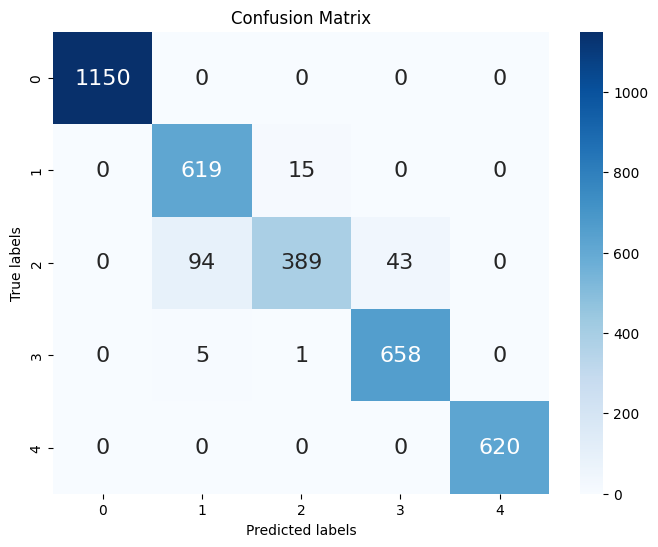

In [134]:
# Make predictions on the test set
rf_classifier.fit(X_train_pca, y_train)
predictions = rf_classifier.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [135]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
import time

# Subtract 1 from y_train to make classes start from 0
y_train_adjusted = y_train - 1

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Measure training time
start_train = time.time()
xgb_classifier.fit(X_train_pca, y_train_adjusted)
end_train = time.time()
train_time = end_train - start_train

# Perform K-fold cross-validation
start_cv = time.time()
cv_scores = cross_val_score(xgb_classifier, X_train_pca, y_train_adjusted, cv=kf)
end_cv = time.time()
cv_time = end_cv - start_cv

# Print training and cross-validation time
print("Training Time:", train_time, "seconds")
print("Cross-validation Time:", cv_time, "seconds")

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())


Training Time: 0.5249667167663574 seconds
Cross-validation Time: 2.2435739040374756 seconds
Cross-validation scores: [0.89445438 0.89028026 0.8986285  0.89028026 0.89206917]
Average cross-validation score: 0.8931425163983302


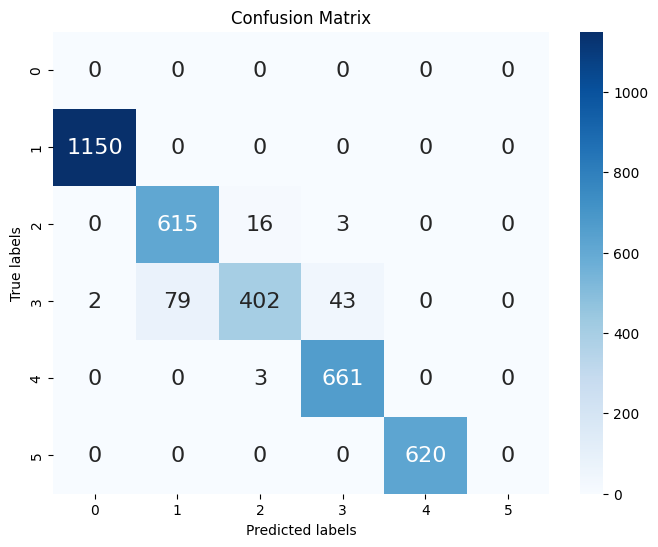

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
xgb_classifier.fit(X_train_pca, y_train_adjusted)  # Assuming y_train_adjusted is adjusted as before
predictions = xgb_classifier.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

LDA

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score
import time

# Create an LDA classifier
lda_classifier = LinearDiscriminantAnalysis()

# Define the number of folds for cross-validation
k_folds = 5

# Create a KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Measure training time
start_train = time.time()
lda_classifier.fit(X_train_pca, y_train)
end_train = time.time()
train_time = end_train - start_train

# Perform K-fold cross-validation
start_cv = time.time()
cv_scores = cross_val_score(lda_classifier, X_train_pca, y_train, cv=kf)
end_cv = time.time()
cv_time = end_cv - start_cv

# Print training and cross-validation time
print("Training Time:", train_time, "seconds")
print("Cross-validation Time:", cv_time, "seconds")

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())


Training Time: 0.00802159309387207 seconds
Cross-validation Time: 0.029817581176757812 seconds
Cross-validation scores: [0.80322004 0.78652355 0.78652355 0.7966607  0.78473465]
Average cross-validation score: 0.7915324985092427


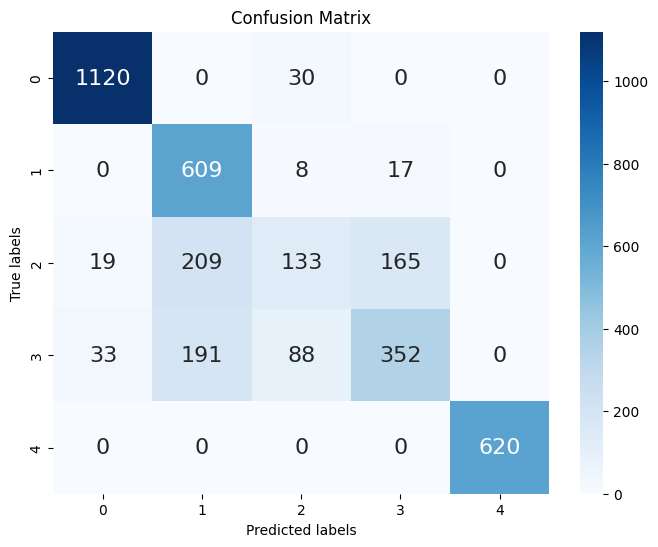

In [138]:
# Make predictions on the test set
lda_classifier.fit(X_train_pca, y_train)
predictions = lda_classifier.predict(X_test_pca)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

We can see through above models that Cross Validation score achieved is highest for KNN classifier that is equal to 99.53%

Regression Algorithms

In [139]:
df1

,Time,Sensor 1,Sensor 2,Type,Concentration
0,0.0,1.227919,0.683820,1,0.4
1,0.5,1.227151,0.683723,1,0.4
2,1.0,1.226392,0.683663,1,0.4
3,1.5,1.225677,0.683743,1,0.4
4,2.0,1.226131,0.684517,1,0.4
...,...,...,...,...,...
3929,1964.0,1.289632,0.657071,1,1.5
3930,1964.5,1.288554,0.656650,1,1.5
3931,1965.0,1.287398,0.656194,1,1.5
3932,1965.5,1.285995,0.655749,1,1.5


In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'df' is your DataFrame containing Time, Sensor 1, Sensor 2, Type, and Concentration columns

# Extract features (X) and target variable (y)
X = df1[['Time', 'Sensor 1', 'Sensor 2', 'Type']]
y = df1['Concentration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [141]:
X

,Time,Sensor 1,Sensor 2,Type
0,0.0,1.227919,0.683820,1
1,0.5,1.227151,0.683723,1
2,1.0,1.226392,0.683663,1
3,1.5,1.225677,0.683743,1
4,2.0,1.226131,0.684517,1
...,...,...,...,...
3929,1964.0,1.289632,0.657071,1
3930,1964.5,1.288554,0.656650,1
3931,1965.0,1.287398,0.656194,1
3932,1965.5,1.285995,0.655749,1


In [142]:
y

0       0.4
1       0.4
2       0.4
3       0.4
4       0.4
       ... 
3929    1.5
3930    1.5
3931    1.5
3932    1.5
3933    1.5
Name: Concentration, Length: 3934, dtype: float64

XGboost Regression

In [143]:
from sklearn.metrics import r2_score

In [144]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

# Initialize the XGBoost regressor model
model = XGBRegressor()

# Measure training time
start_train = time.time()
model.fit(X_train, y_train)
end_train = time.time()
train_time = end_train - start_train

# Make predictions
start_test = time.time()
y_pred = model.predict(X_test)
end_test = time.time()
test_time = end_test - start_test

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Training Time:", train_time, "seconds")
print("Testing Time:", test_time, "seconds")


Mean Squared Error: 5.0258089773644375e-05
R2 Score: 0.9996563480512447
Training Time: 0.04956626892089844 seconds
Testing Time: 0.003648996353149414 seconds


Decision Tree Regressor

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

# Initialize the Decision Tree regressor
decision_tree_regressor = DecisionTreeRegressor()

# Measure training time
start_train_dt = time.time()
decision_tree_regressor.fit(X_train, y_train)
end_train_dt = time.time()
train_time_dt = end_train_dt - start_train_dt

# Make predictions
start_test_dt = time.time()
y_pred_decision_tree = decision_tree_regressor.predict(X_test)
end_test_dt = time.time()
test_time_dt = end_test_dt - start_test_dt

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_decision_tree)
r2_dt = r2_score(y_test, y_pred_decision_tree)

# Print results
print("Decision Tree Regressor:")
print("Mean Squared Error:", mse_dt)
print("R2 Score:", r2_dt)
print("Training Time:", train_time_dt, "seconds")
print("Testing Time:", test_time_dt, "seconds")

Decision Tree Regressor:
Mean Squared Error: 1.023389152106763e-29
R2 Score: 1.0
Training Time: 0.008503913879394531 seconds
Testing Time: 0.0016379356384277344 seconds


Random Forest Regressor

In [146]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest regressor
random_forest_regressor = RandomForestRegressor()

# Measure training time
start_train_rf = time.time()
random_forest_regressor.fit(X_train, y_train)
end_train_rf = time.time()
train_time_rf = end_train_rf - start_train_rf

# Make predictions
start_test_rf = time.time()
y_pred_random_forest = random_forest_regressor.predict(X_test)
end_test_rf = time.time()
test_time_rf = end_test_rf - start_test_rf

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_random_forest)
r2_rf = r2_score(y_test, y_pred_random_forest)

# Print results
print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mse_rf)
print("R2 Score:", r2_rf)
print("Training Time:", train_time_rf, "seconds")
print("Testing Time:", test_time_rf, "seconds")


Random Forest Regressor:
Mean Squared Error: 7.836086404066308e-06
R2 Score: 0.999946418847682
Training Time: 0.42739224433898926 seconds
Testing Time: 0.01257777214050293 seconds


Application

In [147]:
# Define the individual data point
individual_data = [0.0, 1.227919, 0.683820, 1]

# Convert individual_data into a 2D array with shape (1, number_of_features)
individual_data_array = np.array([individual_data])

# Make prediction for the individual point
individual_prediction = random_forest_regressor.predict(individual_data_array)

print("Predicted Concentration:", individual_prediction[0])

Predicted Concentration: 0.400000000000001


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Thanks :)